### Polynomial Regression

#### np.random.rand 
>Random values in a given shape.
>Create an array of the given shape 
>and populate it with random samples from a uniform distribution over [0, 1).

#### np.random.randn
>Return a sample (or samples) from the “standard normal” distribution.

>If positive, int_like or int-convertible arguments are provided, randn generates an array of shape (d0, d1, ..., dn), filled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1 (if any of the  d_i are floats, they are first converted to integers by truncation). A single float randomly sampled from the distribution is returned if no argument is provided.

>This is a convenience function. If you want an interface that takes a tuple as the first argument, use numpy.random.standard_normal instead.

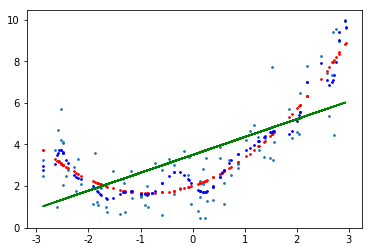

In [20]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y, s=3)

#线性回归 LinearRegression
from  sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

plt.plot(X, y_pred, 'g-')


#多项式回归 Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X)
lin_reg.fit(X_poly, y)
y_poly_pred = lin_reg.predict(X_poly)

#截距 array([ 2.0157545])
lin_reg.intercept_
#系数 array([[ 0.        ,  0.9643639 ,  0.49528261]])
# y = 0 + 0.964X + 0.495 X^2
lin_reg.coef_

plt.scatter(X, y_poly_pred, c='r', s=3)



# 20阶，过拟合
poly_features = PolynomialFeatures(degree=20, include_bias=True)
X_poly = poly_features.fit_transform(X)
lin_reg.fit(X_poly, y)
y_poly_pred = lin_reg.predict(X_poly)

plt.scatter(X, y_poly_pred, c='b', s=3)

In [45]:
poly_features.get_feature_names()
poly_features.powers_
poly_features.n_input_features_
poly_features.n_output_features_

lin_reg.intercept_
lin_reg.coef_

array([[ 0.        ,  0.9643639 ,  0.49528261]])

### Learning Curves

bias vs variance  tradeoff

### Regularized Linear Models

#### Ridge Regression
with L2 pennalty, a regularizeation term equal to $\alpha  \sum_{i=1}^{n} \theta_{i}^{2}$

Ridge Regression cost function:
> $\jmath(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2$

In [63]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 5.28984154]])

In [77]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 4.35391507])

#### Lasso Regression
**Least Absolute Shrinkage and Selection Operator Regression (LASSO)**

with L1 norm
> $\jmath(\theta) = MSE(\theta) + \alpha\sum_{i=1}^{n}\lvert\theta_i\rvert$

>Lasso Regression is tends to completely eliminate the weights of the least important features(i.e., set them to zero). In other words, Lasso Regression automatically performs feature selection and outputs a *sparse model*(i.e., with few nonzero feature weights)

In [74]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 5.25210979])

In [76]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 4.34618674])

#### Elastic Net

The regularization term is simple mix of both Ridge and Lasso's regularization terms

> $\jmath(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^{n}\lvert\theta_i\rvert + \frac{1-r}{2}\alpha\sum_{i=1}^{n}\theta_i^2$


In [79]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 5.25298629])

#### Early Stopping

In [81]:
from sklearn.base import clone

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'y_train' is not defined

### Logistic Regression

>Logistic function

>$\sigma(t)=\frac{1}{1+exp(-t)}$

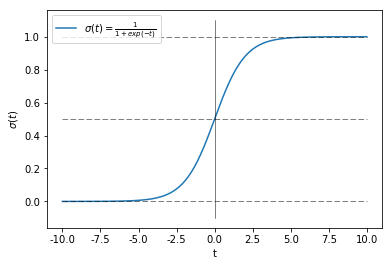

In [114]:
x = np.linspace(-10, 10, 199)
y = 1/(1+np.exp(-x))

plt.plot(x,y,label=r'$\sigma(t)=\frac{1}{1+exp(-t)}$')
plt.legend()
plt.xlabel('t')
plt.ylabel(r'$\sigma(t)$') 


plt.plot([0,0],[-0.1,1.1], 'k-', linewidth=0.5)
plt.plot([-10,10],[0,0], 'k--', linewidth=0.5)
plt.plot([-10,10],[0.5,0.5], 'k--', linewidth=0.5)
plt.plot([-10,10],[1,1], 'k--', linewidth=0.5)

#### Decision Boundaries

In [6]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [23]:
X, y = iris['data'][:,3:], (iris['target'] ==2).astype(np.int)

In [24]:
from sklearn.linear_model import LogisticRegression
import numpy as np

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

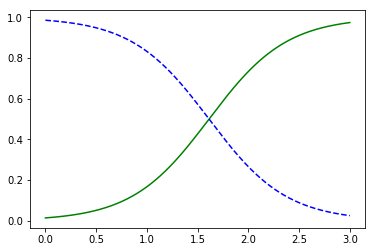

In [25]:
#plot the probability of True and False

X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_prob = log_reg.predict_proba(X_new)

plt.plot(X_new, y_prob[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_prob[:, 0], 'b--', label='Not Iris-Virginica')

In [26]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

#### include two features: petal length and width

In [27]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [112]:
X, y = iris['data'][:,2:], (iris['target'] ==2).astype(np.int)
log_reg.fit(X,y)

log_reg.score(X, y)

0.96666666666666667

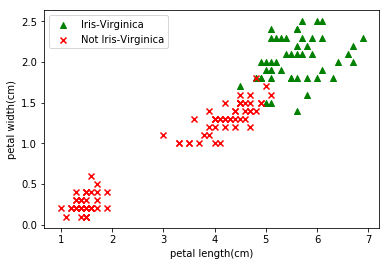

In [81]:
# draw two classes

plt.scatter(X[y==1][:,0],X[y==1][:,1], marker='^', c='g', label='Iris-Virginica')
plt.scatter(X[y==0][:,0],X[y==0][:,1], marker='x', c='r', label='Not Iris-Virginica')

plt.xlabel('petal length(cm)')
plt.ylabel('petal width(cm)')
plt.legend()


#### create a meshgrid and compute the proba

In [36]:
[X.min(axis=0),X.max(axis=0)]

[array([ 1. ,  0.1]), array([ 6.9,  2.5])]

In [123]:

length = np.linspace(1, 6.9, 500)
width = np.linspace(0.1, 2.5, 200)

x1, x2 = np.meshgrid(length, width)
x1 = x1.reshape(-1,1)
x2 = x2.reshape(-1,1)

X_grid = np.concatenate((x1, x2), axis=1) 
y_grid = log_reg.predict_proba(X_grid)[:, 1]


In [130]:
y_grid[(y_grid >=0.9001) & (y_grid<=0.9002)]

array([ 0.90012026,  0.90016309,  0.90012551,  0.90016835,  0.90013076,
        0.9001736 ,  0.90013602,  0.90017885,  0.90014127,  0.9001841 ])

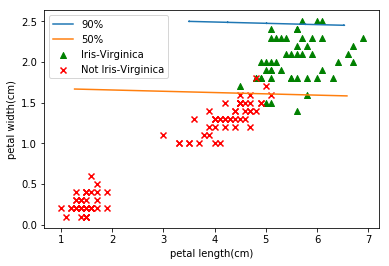

In [141]:
plt.scatter(X[y==1][:,0],X[y==1][:,1], marker='^', c='g', label='Iris-Virginica')
plt.scatter(X[y==0][:,0],X[y==0][:,1], marker='x', c='r', label='Not Iris-Virginica')

plt.xlabel('petal length(cm)')
plt.ylabel('petal width(cm)')


p_90 = X_grid[(y_grid >=0.9001) & (y_grid<=0.9002)]
plt.plot(p_90[:,0], p_90[:,1], label='90%')

p_50 = X_grid[(y_grid >=0.5001) & (y_grid<=0.5002)]
plt.plot(p_50[:,0], p_50[:,1], label='50%')
#p_90 = X_grid[(y_grid >= 0.75) & (y_grid < 0.751)]
#plt.plot(p_90[:,0], p_90[:,1])


plt.legend()

#### Softmax

In [146]:
X = iris['data'][:,(2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)
print(softmax_reg.score(X, y))


ovr_reg = LogisticRegression()
ovr_reg.fit(X, y)
print(ovr_reg.score(X, y))


0.96
0.873333333333
